<a href="https://colab.research.google.com/github/Jorge-Calderon21/challenge-data-science_TelecomX_parte2/blob/main/Challenge_TelecomX_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd, json, os, pathlib

In [8]:
from google.colab import drive
drive.mount('/content/drive')
CSV_PATH = "/content/drive/MyDrive/clientes_clean.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df = pd.read_csv(CSV_PATH)
print("Shape:", df.shape)
df.head(3)

Shape: (7267, 22)


,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn_flag
0,0002-ORFBO,No,Female,0,Yes,Yes,9.0,Yes,No,Dsl,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,0.0
1,0003-MKNFE,No,Male,0,No,No,9.0,Yes,Yes,Dsl,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,0.0
2,0004-TLHLJ,Yes,Male,0,No,No,4.0,Yes,No,Fiber Optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,1.0


In [12]:
# Lista de columnas irrelevantes a eliminar
irrelevantes = ["customerid", "churn_flag"]

# Eliminar solo si existen en el dataset
df = df.drop(columns=[c for c in irrelevantes if c in df.columns], errors="ignore")

print("Columnas eliminadas:", irrelevantes)
print("Shape después de la limpieza:", df.shape)

# Confirmar columnas restantes
df.head()

Columnas eliminadas: ['customerid', 'churn_flag']
Shape después de la limpieza: (7267, 20)


,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,No,Female,0,Yes,Yes,9.0,Yes,No,Dsl,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,No,Male,0,No,No,9.0,Yes,Yes,Dsl,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,Yes,Male,0,No,No,4.0,Yes,No,Fiber Optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13.0,Yes,No,Fiber Optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3.0,Yes,No,Fiber Optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [13]:
# Seleccionar columnas categóricas
cat_cols = [
    "gender","partner","dependents","phoneservice","multiplelines",
    "internetservice","onlinesecurity","onlinebackup","deviceprotection",
    "techsupport","streamingtv","streamingmovies","contract",
    "paperlessbilling","paymentmethod"
]

# One-Hot Encoding con pandas
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("Shape original:", df.shape)
print("Shape con encoding:", df_encoded.shape)
df_encoded.head()

Shape original: (7267, 20)
Shape con encoding: (7267, 31)


,churn,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No Phone Service,...,streamingtv_No Internet Service,streamingtv_Yes,streamingmovies_No Internet Service,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,No,0,9.0,65.6,593.30,False,True,True,True,False,...,False,True,False,False,True,False,True,False,False,True
1,No,0,9.0,59.9,542.40,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2,Yes,0,4.0,73.9,280.85,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
3,Yes,1,13.0,98.0,1237.85,True,True,False,True,False,...,False,True,False,True,False,False,True,False,True,False
4,Yes,1,3.0,83.9,267.40,False,True,False,True,False,...,False,True,False,False,False,False,True,False,False,True


Conteo absoluto:
churn
No     5174
Yes    1869
Name: count, dtype: int64

Proporción (%):
churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


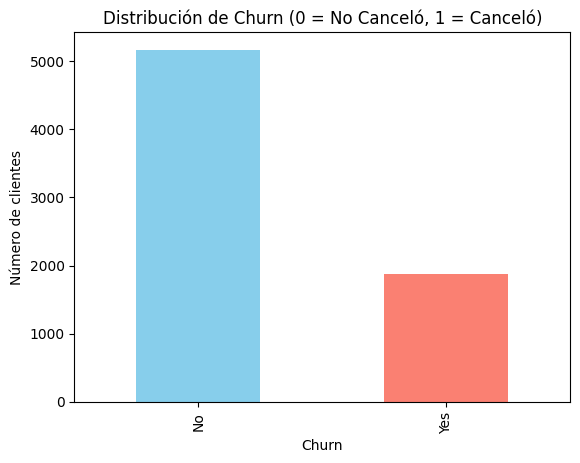

In [14]:
# Ver distribución del target
print("Conteo absoluto:")
print(df["churn"].value_counts())

print("\nProporción (%):")
print(df["churn"].value_counts(normalize=True) * 100)

# Visualización rápida
import matplotlib.pyplot as plt

df["churn"].value_counts().plot(kind="bar", color=["skyblue","salmon"])
plt.title("Distribución de Churn (0 = No Canceló, 1 = Canceló)")
plt.xlabel("Churn")
plt.ylabel("Número de clientes")
plt.show()

Correlación de las variables con 'churn':
churn             1.000000
monthlycharges    0.193356
seniorcitizen     0.150889
totalcharges     -0.199037
tenure           -0.352229
Name: churn, dtype: float64


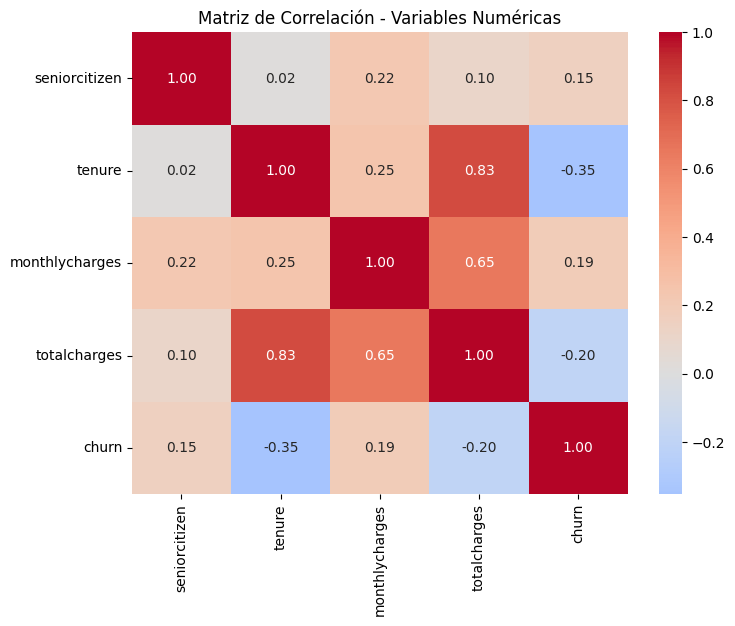

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo las columnas numéricas que nos interesan
num_cols = ['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges', 'churn']

# Asegurar que todas son numéricas
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Eliminar filas con valores faltantes en esas columnas
df_num = df[num_cols].dropna()

# Calcular la matriz de correlación
corr = df_num.corr(method='pearson')

# Mostrar correlación de cada variable con churn
print("Correlación de las variables con 'churn':")
print(corr['churn'].sort_values(ascending=False))

# Graficar heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Matriz de Correlación - Variables Numéricas")
plt.show()


/tmp/ipython-input-1704578436.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='tenure', data=df, palette="Set2")


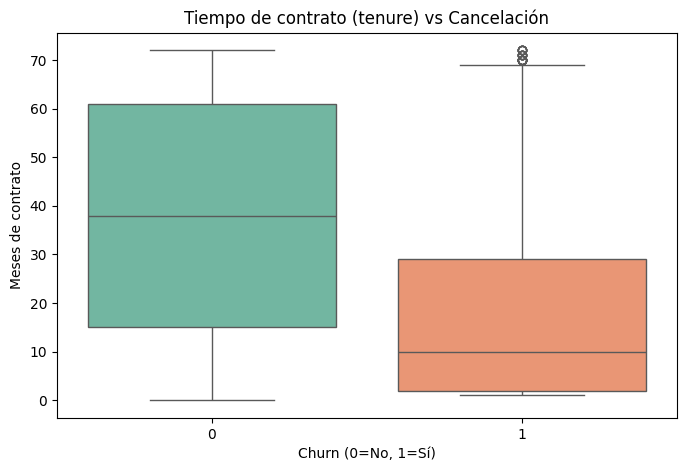

/tmp/ipython-input-1704578436.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='totalcharges', data=df, palette="Set1")


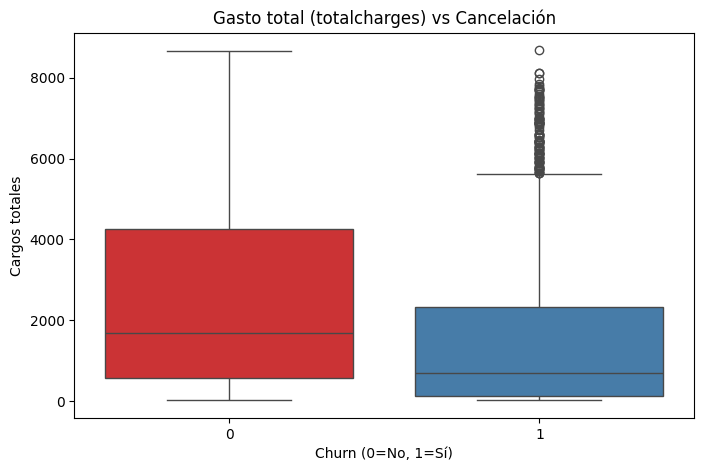

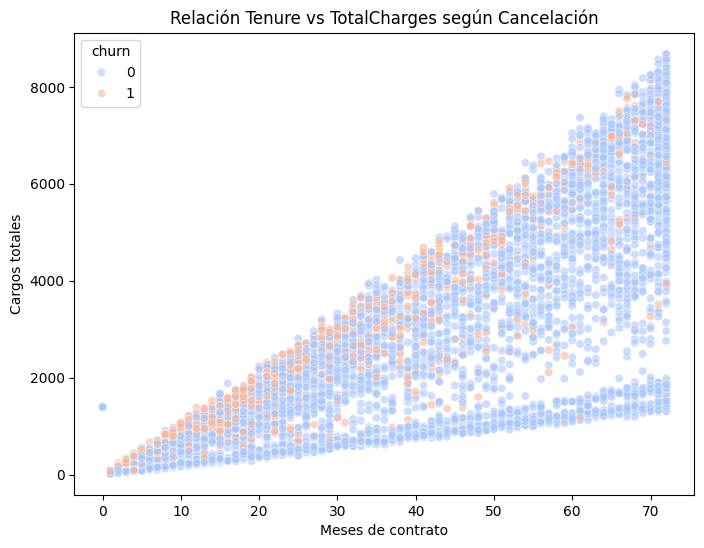

In [60]:
# Boxplot: Tiempo de contrato vs Cancelación
plt.figure(figsize=(8,5))
sns.boxplot(x='churn', y='tenure', data=df, palette="Set2")
plt.title("Tiempo de contrato (tenure) vs Cancelación")
plt.xlabel("Churn (0=No, 1=Sí)")
plt.ylabel("Meses de contrato")
plt.show()

# Boxplot: Gasto total vs Cancelación
plt.figure(figsize=(8,5))
sns.boxplot(x='churn', y='totalcharges', data=df, palette="Set1")
plt.title("Gasto total (totalcharges) vs Cancelación")
plt.xlabel("Churn (0=No, 1=Sí)")
plt.ylabel("Cargos totales")
plt.show()

# Scatter plot opcional: Tenure vs TotalCharges coloreado por Churn
plt.figure(figsize=(8,6))
sns.scatterplot(x='tenure', y='totalcharges', hue='churn', data=df, alpha=0.6, palette="coolwarm")
plt.title("Relación Tenure vs TotalCharges según Cancelación")
plt.xlabel("Meses de contrato")
plt.ylabel("Cargos totales")
plt.show()


### **🤖 Modelado Predictivo**

In [64]:
from sklearn.model_selection import train_test_split

# X son las variables predictoras, y es la variable objetivo (churn en este caso)
X = df.drop(columns=['churn'])   # todo menos churn
y = df['churn']

# División 70% entrenamiento y 30% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Tamaño conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Tamaño conjunto de prueba:", X_test.shape, y_test.shape)

Tamaño conjunto de entrenamiento: (4930, 21) (4930,)
Tamaño conjunto de prueba: (2113, 21) (2113,)


In [66]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 1) Detectar tipos de variables a partir de X_train
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X_train.columns if c not in num_cols]

# 2) Preprocesadores
#   - Para modelos SENSIBLES a escala: escalar numéricas + OHE en categóricas
preproc_scaled = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ],
    remainder="drop"
)

#   - Para modelos NO sensibles a escala: solo OHE en categóricas
preproc_no_scale = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ],
    remainder="drop"
)

# 3) Modelos
#   A) Regresión Logística (sensible a escala → usa preproc_scaled)
logreg = Pipeline(steps=[
    ("prep", preproc_scaled),
    ("clf", LogisticRegression(max_iter=2000, class_weight="balanced", random_state=42))
])

#   B) Random Forest (no sensible a escala → usa preproc_no_scale)
rf = Pipeline(steps=[
    ("prep", preproc_no_scale),
    ("clf", RandomForestClassifier(
        n_estimators=400, random_state=42, n_jobs=-1, class_weight="balanced_subsample"
    ))
])

# 4) Entrenar (creación + ajuste de los modelos)
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)

print("Modelos creados y ajustados:")
print(" - Pipeline LogReg (con escalado) -> logreg")
print(" - Pipeline RandomForest (sin escalado) -> rf")


Modelos creados y ajustados:
 - Pipeline LogReg (con escalado) -> logreg
 - Pipeline RandomForest (sin escalado) -> rf



Resultados para Regresión Logística
Exactitud (Accuracy): 1.0
Precisión: 1.0
Recall: 1.0
F1-score: 1.0

Reporte de Clasificación:
               precision    recall  f1-score   support

           0      1.000     1.000     1.000      1552
           1      1.000     1.000     1.000       561

    accuracy                          1.000      2113
   macro avg      1.000     1.000     1.000      2113
weighted avg      1.000     1.000     1.000      2113

Accuracy Train: 1.000 | Accuracy Test: 1.000
Buen equilibrio entre entrenamiento y prueba.


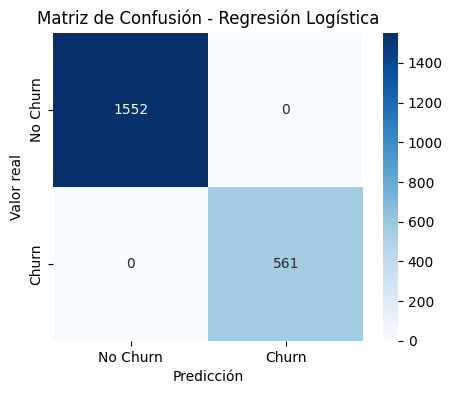


Resultados para Random Forest
Exactitud (Accuracy): 0.967
Precisión: 1.0
Recall: 0.877
F1-score: 0.934

Reporte de Clasificación:
               precision    recall  f1-score   support

           0      0.957     1.000     0.978      1552
           1      1.000     0.877     0.934       561

    accuracy                          0.967      2113
   macro avg      0.979     0.939     0.956      2113
weighted avg      0.969     0.967     0.967      2113

Accuracy Train: 1.000 | Accuracy Test: 0.967
Buen equilibrio entre entrenamiento y prueba.


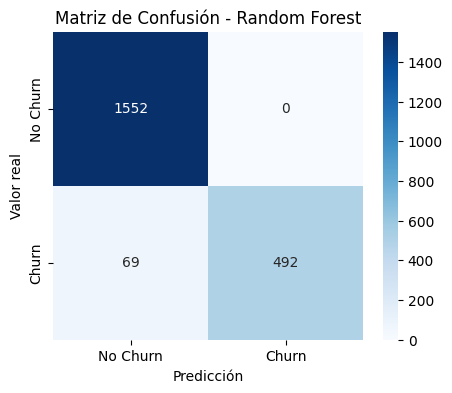

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


def evaluar_modelo(modelo, X_train, y_train, X_test, y_test, nombre="Modelo"):
    # Predicciones
    y_pred_train = modelo.predict(X_train)
    y_pred_test  = modelo.predict(X_test)

    # Métricas en TEST
    acc  = accuracy_score(y_test, y_pred_test)
    prec = precision_score(y_test, y_pred_test)
    rec  = recall_score(y_test, y_pred_test)
    f1   = f1_score(y_test, y_pred_test)

    print(f"\nResultados para {nombre}")
    print("Exactitud (Accuracy):", round(acc,3))
    print("Precisión:", round(prec,3))
    print("Recall:", round(rec,3))
    print("F1-score:", round(f1,3))
    print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_test, digits=3))

    # Comparación Train vs Test → para detectar overfitting/underfitting
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test  = acc
    print(f"Accuracy Train: {acc_train:.3f} | Accuracy Test: {acc_test:.3f}")

    if acc_train - acc_test > 0.10:
        print("Posible OVERFITTING (muy buen rendimiento en entrenamiento pero no generaliza).")
    elif acc_test < 0.6:
        print("Posible UNDERFITTING (modelo demasiado simple, no captura los patrones).")
    else:
        print("Buen equilibrio entre entrenamiento y prueba.")

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["No Churn","Churn"], yticklabels=["No Churn","Churn"])
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.ylabel("Valor real")
    plt.xlabel("Predicción")
    plt.show()

    return {"accuracy":acc, "precision":prec, "recall":rec, "f1":f1}

# Evaluar ambos modelos
res_logreg = evaluar_modelo(logreg, X_train, y_train, X_test, y_test, "Regresión Logística")
res_rf     = evaluar_modelo(rf, X_train, y_train, X_test, y_test, "Random Forest")

# **📋 Interpretación y Conclusiones**

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# ---------- helpers ----------
def get_feature_names_safe(prep, X_sample):
    """Devuelve nombres reales de salida del ColumnTransformer 'prep'."""
    # 1) intento directo (sklearn >=1.0)
    try:
        names = prep.get_feature_names_out()
        return np.array(names, dtype=object)
    except Exception:
        pass

    names = []
    for name, trans, cols in prep.transformers_:
        if trans == "drop":
            continue
        if hasattr(trans, "get_feature_names_out"):
            try:
                part = trans.get_feature_names_out(cols)
            except Exception:
                part = trans.get_feature_names_out()
            names.extend(part)
        elif hasattr(trans, "named_steps"):  # pipeline
            if "ohe" in trans.named_steps:
                ohe = trans.named_steps["ohe"]
                part = ohe.get_feature_names_out(cols)
                names.extend(part)
            else:
                # pipeline numérica (p.ej. scaler): mismos nombres
                names.extend(cols)
        else:
            names.extend(cols)

    # Validar longitud; si no cuadra, usar fallback genérico
    n_out = prep.transform(X_sample).shape[1]
    if len(names) != n_out:
        print(f"Aviso: nombres({len(names)}) ≠ n_features_out({n_out}). Usaré nombres genéricos.")
        names = [f"feat_{i}" for i in range(n_out)]
    return np.array(names, dtype=object)

def plot_barh(df_imp, value_col, label_col="feature", title="Importancia de variables"):
    dfp = df_imp.iloc[::-1]
    plt.figure(figsize=(8, max(4, 0.35*len(dfp))))
    plt.barh(dfp[label_col], dfp[value_col])
    plt.title(title)
    plt.xlabel(value_col)
    plt.tight_layout()
    plt.show()

# ---------- Regresión Logística (coeficientes) ----------
def importancia_logistica(pipeline, X_train, top_n=15, nombre="Regresión Logística"):
    prep = pipeline.named_steps["prep"]
    clf  = pipeline.named_steps["clf"]
    feat_names = get_feature_names_safe(prep, X_train.iloc[:1])
    coefs = clf.coef_.ravel()
    imp = pd.DataFrame({"feature": feat_names, "coef": coefs})
    imp["abs_coef"] = imp["coef"].abs()
    imp = imp.sort_values("abs_coef", ascending=False).head(top_n)[["feature","coef"]]
    display(imp)
    plot_barh(imp, "coef", "feature", f"Coeficientes — {nombre}")
    return imp

# ---------- Random Forest (feature_importances_) ----------
def importancia_rf(pipeline, X_train, top_n=15, nombre="Random Forest"):
    prep = pipeline.named_steps["prep"]
    clf  = pipeline.named_steps["clf"]
    feat_names = get_feature_names_safe(prep, X_train.iloc[:1])
    importances = clf.feature_importances_
    imp = pd.DataFrame({"feature": feat_names, "importance": importances})
    imp = imp.sort_values("importance", ascending=False).head(top_n)
    display(imp)
    plot_barh(imp, "importance", "feature", f"Importancia Gini — {nombre}")
    return imp

# ---------- Permutation Importance (KNN / SVM / cualquiera) ----------
def importancia_permutacion(modelo, X_test, y_test, top_n=15, nombre="Modelo"):
    # Usamos nombres de columnas ORIGINALES (interpretables)
    feat_labels = list(X_test.columns)
    r = permutation_importance(modelo, X_test, y_test, n_repeats=10,
                               random_state=42, scoring="f1")
    imp = pd.DataFrame({
        "feature": feat_labels,
        "importance_mean": r.importances_mean,
        "importance_std": r.importances_std
    }).sort_values("importance_mean", ascending=False).head(top_n)
    display(imp)
    plot_barh(imp, "importance_mean", "feature", f"Permutation Importance — {nombre}")
    return imp

,feature,coef
4,num__churn_flag,5.803230
4942,cat__phoneservice_Yes,-0.373066
1,num__tenure,-0.337762
4970,cat__paperlessbilling_No,-0.302266
4969,cat__contract_Two year,-0.297916
4946,cat__internetservice_Dsl,-0.264406
4938,cat__partner_Yes,-0.262351
4940,cat__dependents_Yes,-0.245069
4936,cat__gender_Male,-0.240145
4960,cat__techsupport_Yes,-0.229793


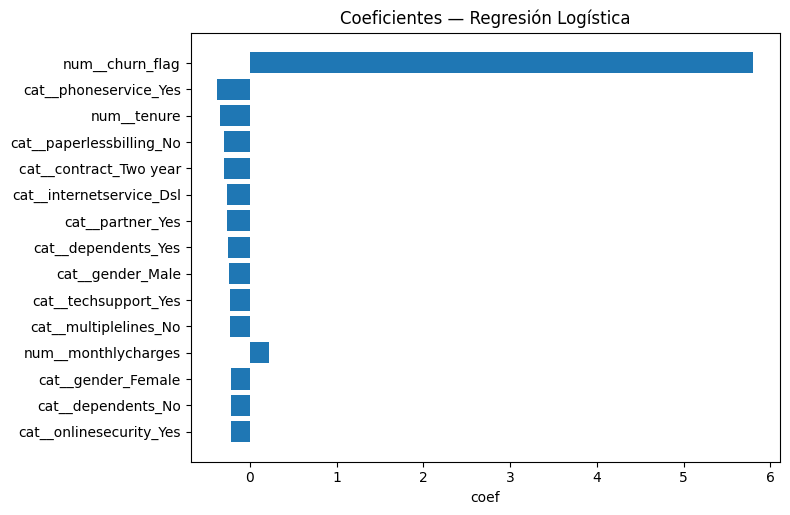

,feature,importance
4,num__churn_flag,0.312279
1,num__tenure,0.058381
3,num__totalcharges,0.052924
2,num__monthlycharges,0.041692
4967,cat__contract_Month-to-month,0.034337
4969,cat__contract_Two year,0.020570
4947,cat__internetservice_Fiber Optic,0.018286
4958,cat__techsupport_No,0.017493
4949,cat__onlinesecurity_No,0.017078
4974,cat__paymentmethod_Electronic check,0.016872


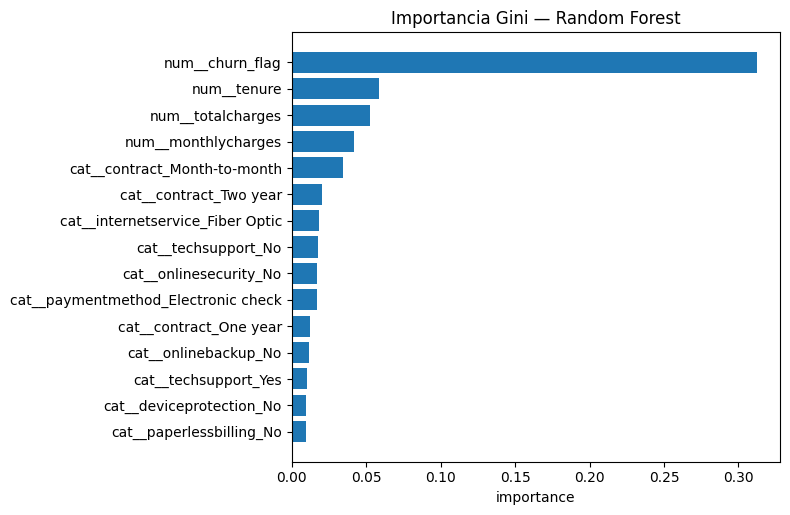

In [80]:
# LogReg (pipeline: prep + clf)
imp_log = importancia_logistica(logreg, X_train, top_n=15, nombre="Regresión Logística")

# Random Forest (pipeline: prep + clf)
imp_rf  = importancia_rf(rf, X_train, top_n=15, nombre="Random Forest")